In [2]:
import pyfits
import scipy.optimize as opt
import numpy as np
import pylab as plt
import rydlab
import pandas as pd
from fitting2d import Fit2d2Gaussian
import os
from lmfit import Model
pd.options.display.max_colwidth = 120
import matplotlib as mpl
mpl.rc('image', cmap='afmhot')

file_date = '2019-06-05'
path = 'A:/Projekte - Projects/2019_IEI/June/28'
folders = rydlab.analyze_folder(path,filter=0)
folders

,Name,Valid
0,A:/Projekte - Projects/2019_IEI/June/28\EIT1,True
1,A:/Projekte - Projects/2019_IEI/June/28\EIT1_averaged_images,False
2,A:/Projekte - Projects/2019_IEI/June/28\EITwithBinning,True
3,A:/Projekte - Projects/2019_IEI/June/28\EITwithBinning1,True
4,A:/Projekte - Projects/2019_IEI/June/28\EITwithBinning1_averaged_images,False
5,A:/Projekte - Projects/2019_IEI/June/28\EITwithBinning_averaged_images,False
6,A:/Projekte - Projects/2019_IEI/June/28\Scanred,True
7,A:/Projekte - Projects/2019_IEI/June/28\Scanred_averaged_images,False


In [3]:
path=folders.Name[7]

os.chdir(path)

print(os.getcwd())

def fitsopen(n):
    if n<10:
        hdulist = pyfits.open(file_date+str("_")+str(0)+str(n)+'.fts')
    else:
        hdulist = pyfits.open(file_date+str("_")+str(n)+'.fts')

    data=np.zeros((90,400))

    for y in range(10,100):
        for x in range(10,410):
            if hdulist[0].data[0,y,x]>hdulist[0].data[2,y,x]: and hdulist[0].data[1,y,x]>hdulist[0].data[2,y,x]:
                data[y-10,x-10]=-np.log((hdulist[0].data[0,y,x]-hdulist[0].data[2,y,x])/(hdulist[0].data[1,y,x]-hdulist[0].data[2,y,x]))
            else:
                data[y-10,x-10]=-np.log(hdulist[0].data[2,y,x])
    hdulist.close()
    return data

def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x, y) = xdata_tuple
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo)
                        + c*((y-yo)**2)))
    return g.flatten()


def two_Gaussian(xdata_tuple, amplitude1, xo1, yo1, sigma_x1, sigma_y1, theta1, amplitude2, xo2, yo2, sigma_x2, sigma_y2, theta2, offset):
    (x, y) = xdata_tuple
    xo1 = float(xo1)
    yo1 = float(yo1)
    xo2 = float(xo2)
    yo2 = float(yo2)

    a1 = (np.cos(theta1)**2)/(2*sigma_x1**2) + (np.sin(theta1)**2)/(2*sigma_y1**2)
    b1 = -(np.sin(2*theta1))/(4*sigma_x1**2) + (np.sin(2*theta1))/(4*sigma_y1**2)
    c1 = (np.sin(theta1)**2)/(2*sigma_x1**2) + (np.cos(theta1)**2)/(2*sigma_y1**2)
    a2 = (np.cos(theta2)**2)/(2*sigma_x2**2) + (np.sin(theta2)**2)/(2*sigma_y2**2)
    b2 = -(np.sin(2*theta2))/(4*sigma_x2**2) + (np.sin(2*theta2))/(4*sigma_y2**2)
    c2 = (np.sin(theta2)**2)/(2*sigma_x2**2) + (np.cos(theta2)**2)/(2*sigma_y2**2)

    g = offset + amplitude1*np.exp( - (a1*((x-xo1)**2) + 2*b1*(x-xo1)*(y-yo1) + c1*((y-yo1)**2))) + amplitude2*np.exp( - (a2*((x-xo2)**2) + 2*b2*(x-xo2)*(y-yo2) + c2*((y-yo2)**2)))

    return g.flatten()



def lorentz(x_array,gamma,xoo,a,o):
    xoo = float(xoo)
    gamma = float(gamma)
    x=x_array
    #print(x)
    #print(type(x))
    #l=gamma/((2*np.pi)((x-xoo)**2 + (gamma/2)**2))
    l=a*gamma/( (x-xoo)**2 + (gamma/2)**2 )+o
    #print(l)
    #print(type(l))
    return l#/(2*np.pi)


SyntaxError: invalid syntax (<ipython-input-3-16d946f443f5>, line 17)

0
[ 8.45879311e-02  1.50397422e+02  4.47790715e+01  7.95209283e+01
  3.70333091e+01  3.15658419e+00  1.49709891e-01  1.70760633e+02
  4.87894196e+01  6.79018046e+00  5.77073396e+00  2.26743708e+00
 -1.51598885e-02]
Variable = -8.000  Cloud Transmission = 0.919  DipValue = 0.150  Transmission at Dip = 0.791 


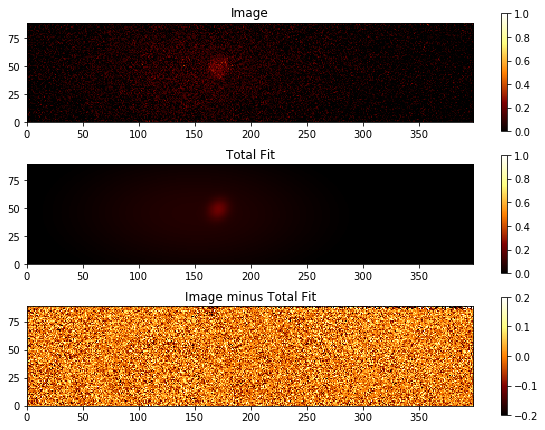

1
[ 9.74422390e-02  1.49187213e+02  4.55164347e+01  7.97750114e+01
  3.64717740e+01  3.16808978e+00  1.40527910e-01  1.70235328e+02
  4.93019352e+01  6.93479406e+00  6.47915508e+00 -5.06969495e-01
 -1.40046534e-02]
Variable = -7.360  Cloud Transmission = 0.907  DipValue = 0.141  Transmission at Dip = 0.788 


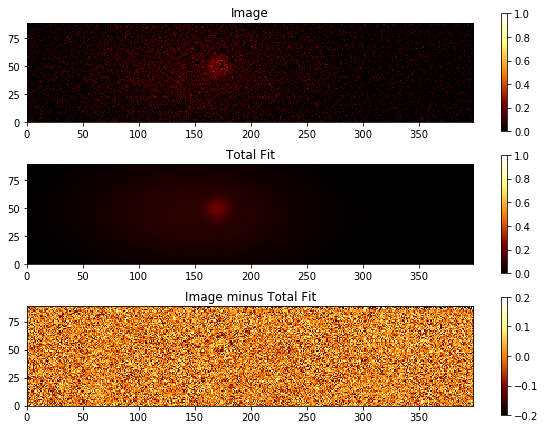

2
[ 1.11168962e-01  1.49580991e+02  4.51313168e+01  7.94761265e+01
  3.65235695e+01  3.16018572e+00  1.42432024e-01  1.70924040e+02
  4.86726344e+01  7.86011414e+00  6.56316165e+00  2.03749998e+00
 -1.23843082e-02]
Variable = -6.720  Cloud Transmission = 0.895  DipValue = 0.142  Transmission at Dip = 0.776 


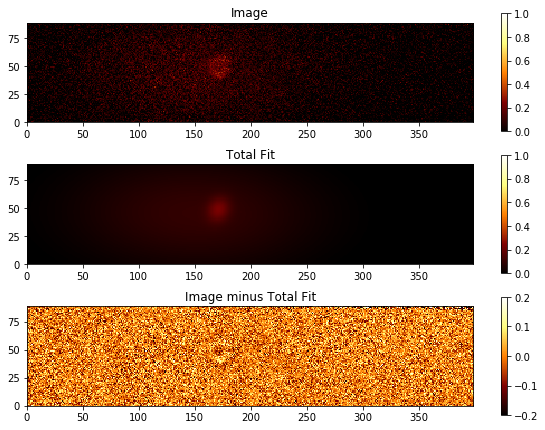

3
[ 1.28129140e-01  1.48274866e+02  4.47370065e+01  7.95382576e+01
  3.68329667e+01  3.15492969e+00  1.38303174e-01  1.71181217e+02
  4.83171407e+01  6.48119120e+00  8.12273968e+00  3.74449042e+00
 -1.22564987e-02]
Variable = -6.080  Cloud Transmission = 0.880  DipValue = 0.138  Transmission at Dip = 0.766 


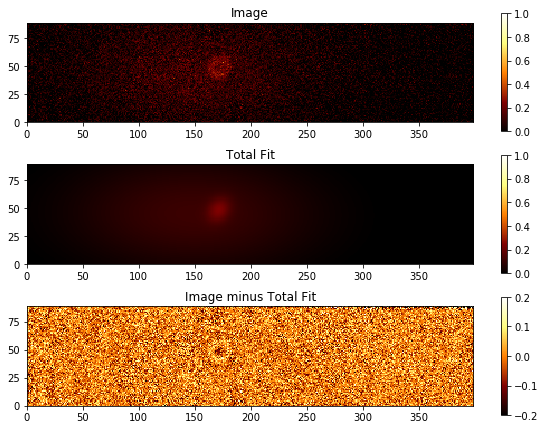

4
[ 1.44458497e-01  1.48524182e+02  4.44149775e+01  7.87412177e+01
  3.70013188e+01  3.15680746e+00  1.30707770e-01  1.70514855e+02
  4.89507709e+01 -7.66206888e+00 -8.56820819e+00  3.46814913e+00
 -9.84245376e-03]
Variable = -5.440  Cloud Transmission = 0.865  DipValue = 0.131  Transmission at Dip = 0.759 


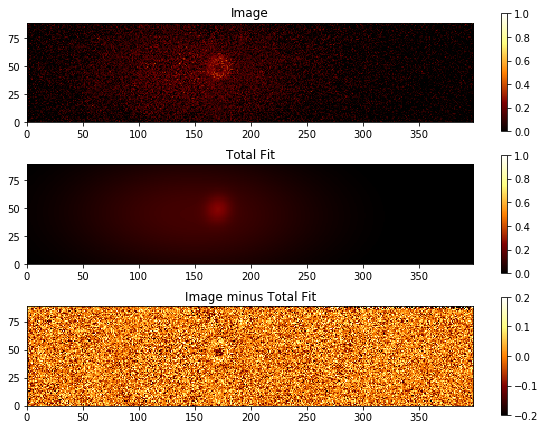

5


C:\Users\Control_Computer\AppData\Local\conda\conda\envs\rydlab\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

invalid value encountered in log



couldn't fit file 5
array must not contain infs or NaNs
6
[ 2.06203930e-01  1.49256041e+02  4.34916641e+01  7.80291349e+01
  3.61237300e+01  3.14590611e+00  9.23531198e-02  1.70519316e+02
  4.80957195e+01  1.09468107e+01  8.77937444e+00 -1.13724637e+00
 -6.75621922e-03]
couldn't fit file 6
list index out of range
7
[ 2.56331886e-01  1.48231890e+02  4.40085170e+01  7.55683373e+01
  3.54253560e+01  3.14694076e+00  1.15839096e-01  1.67670766e+02
  5.51087121e+01  8.61842588e+00 -2.79602146e+00  1.69112889e+02
 -3.28712472e-03]
couldn't fit file 7
list index out of range
8
[ 3.13310531e-01  1.49152759e+02  4.40613791e+01  7.50097361e+01
  3.52308495e+01  3.14486647e+00 -1.82728126e-01  1.70440438e+02
  4.85712369e+01 -2.40613830e+00 -2.24564782e+00  3.64172769e+00
  5.81714059e-04]
couldn't fit file 8
list index out of range
9
[ 3.77157240e-01  1.47966121e+02  4.36591642e+01  7.44391657e+01
  3.53067297e+01  3.15378290e+00 -2.56492014e-01  1.70690119e+02
  4.81349959e+01 -2.93890669e+00 -3

C:\Users\Control_Computer\AppData\Local\conda\conda\envs\rydlab\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



[ 8.76583634e-02  1.45839235e+02  4.54617125e+01  7.87202137e+01
  3.51775224e+01  3.19020555e+00 -2.73797464e-02  1.69214153e+02
  4.88832087e+01  1.14008277e+01  5.67988803e+00  9.16804894e+00
 -1.37824279e-02]
couldn't fit file 25
list index out of range


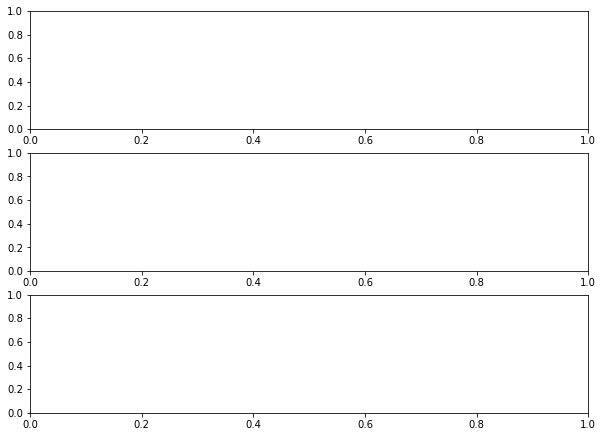

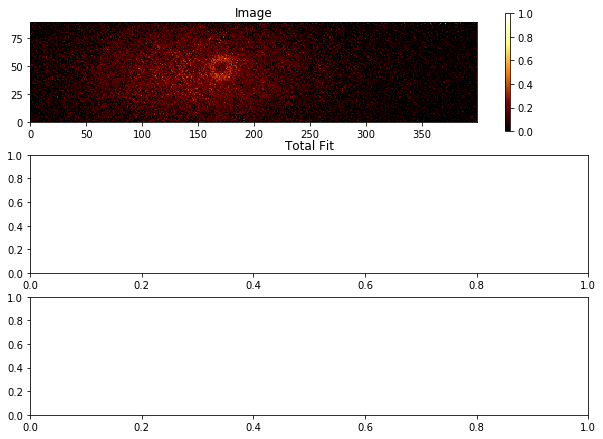

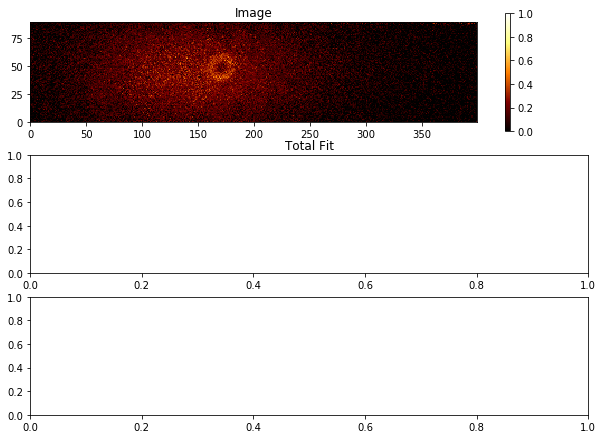

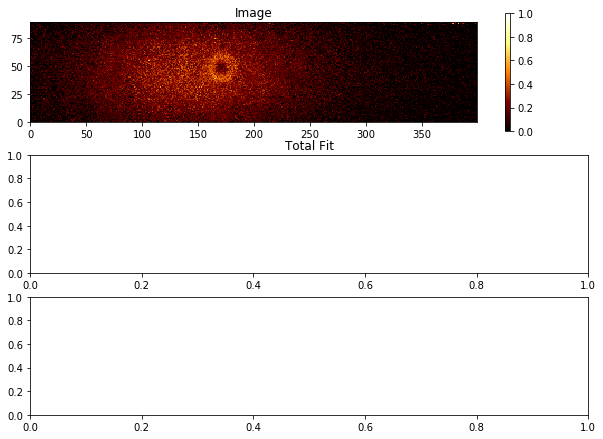

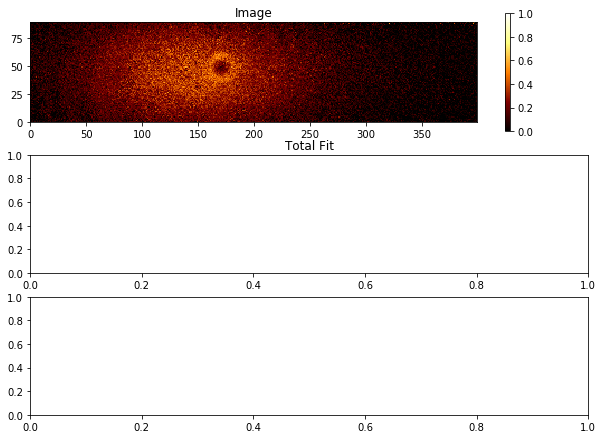

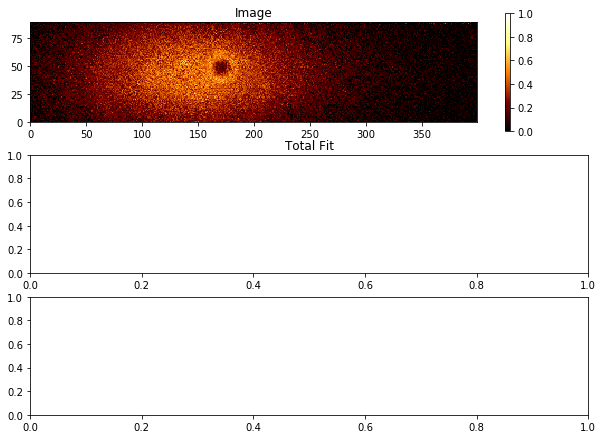

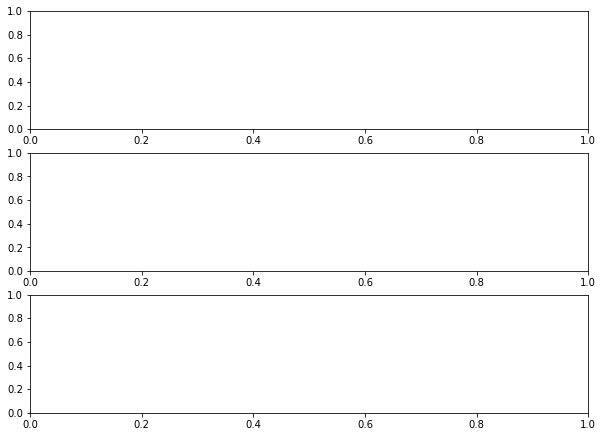

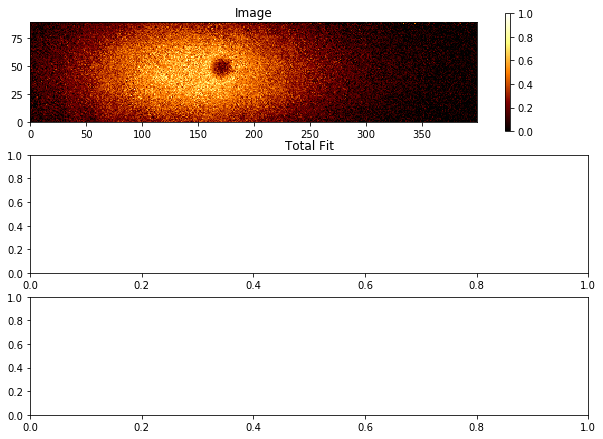

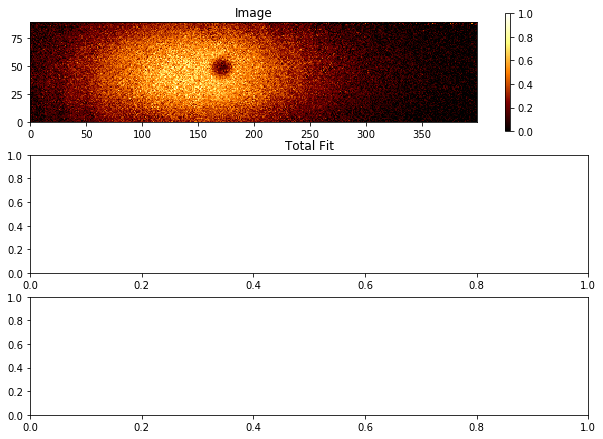

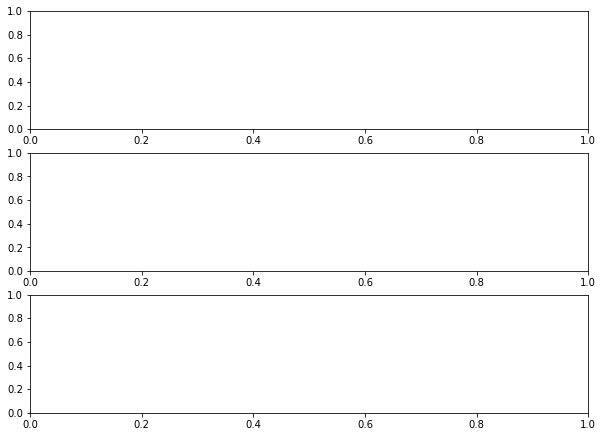

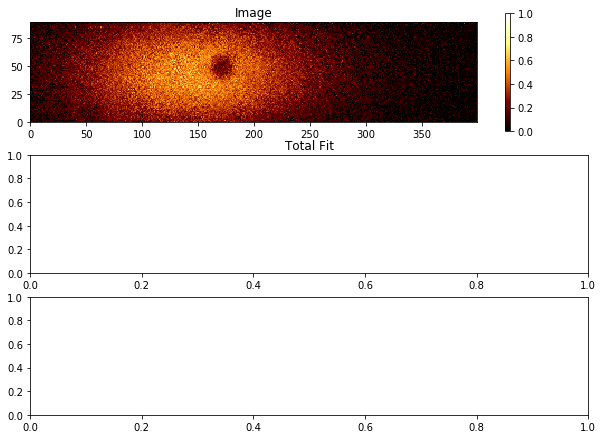

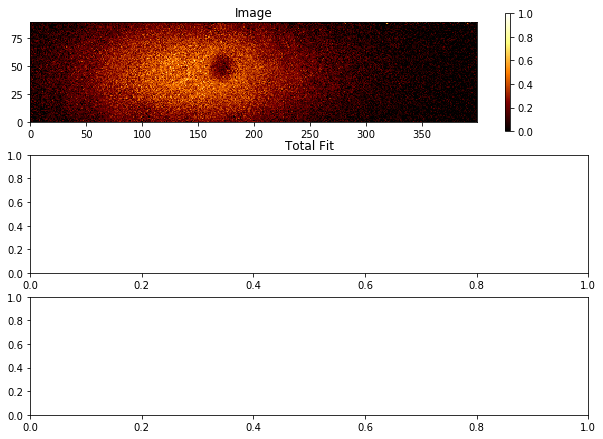

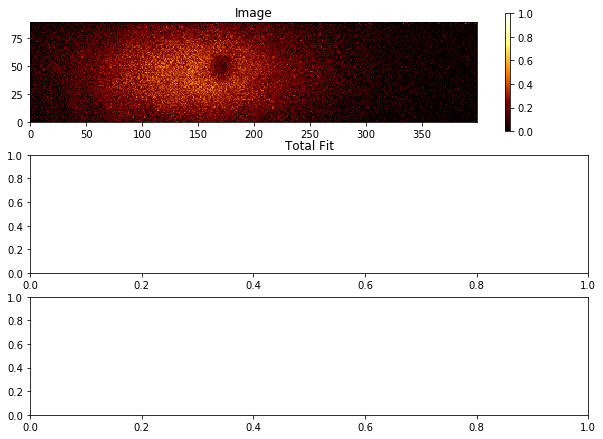

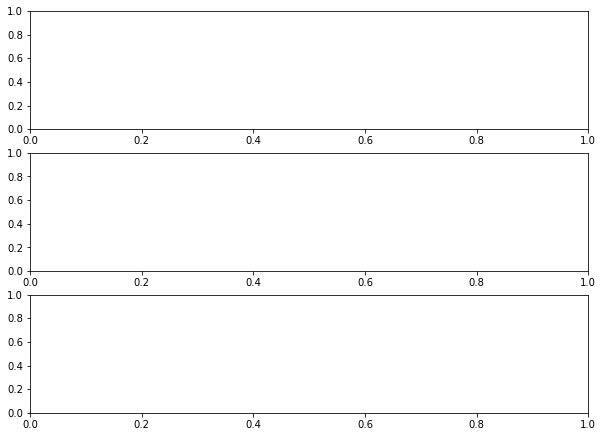

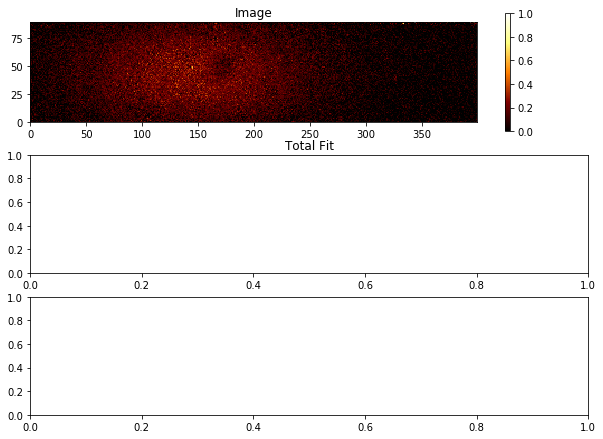

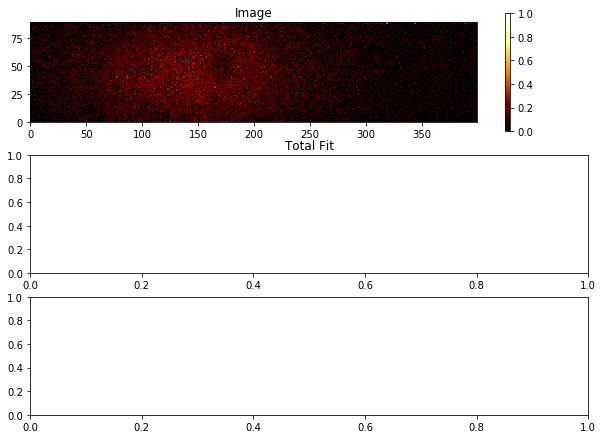

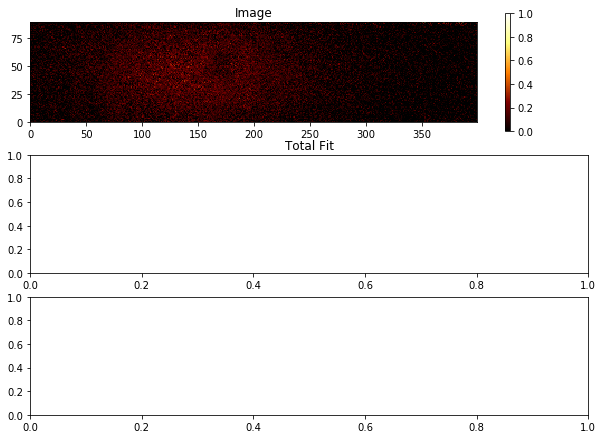

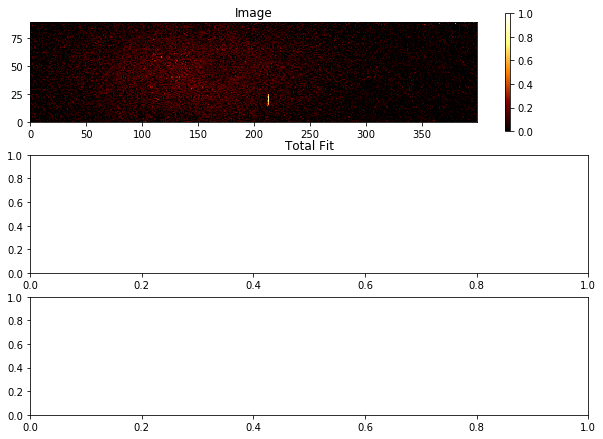

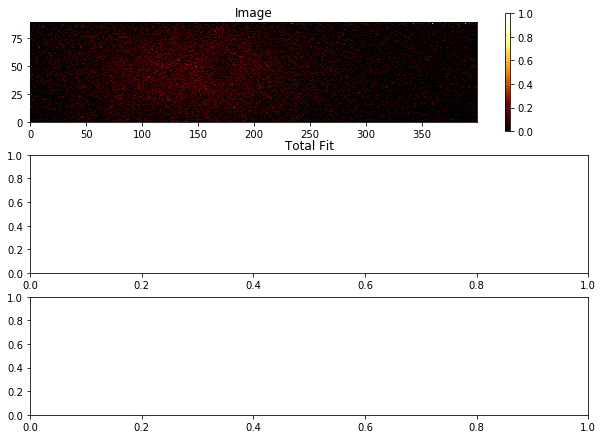

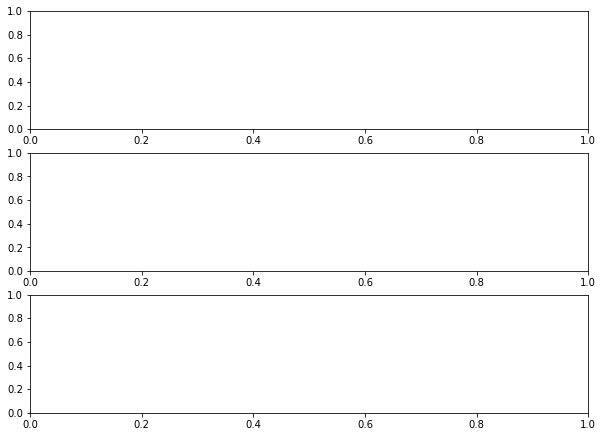

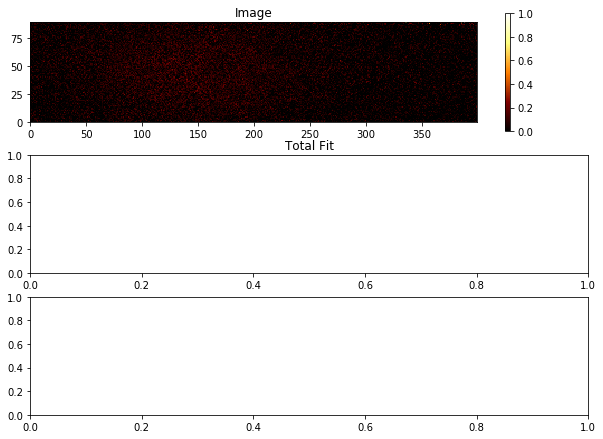

In [214]:
valred=[]
valblue=[]
valdiv=[]
valsum=[]

variables = np.loadtxt( '2019-06-05_variables.dat' )[:,1]
total_fitted=[]
fit_errors=[]
for n in range(0,len(variables)):
    print(n)
    x = np.linspace(0, 399, 400)
    y = np.linspace(0, 89, 90)
    x, y = np.meshgrid(x, y)
    
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(4, 1, 1)
    ax2 = fig.add_subplot(4, 1, 2)
    ax3 = fig.add_subplot(4, 1, 3)
    #ax4 = plt.subplot(4, 1, 4)
    
    

    
    
    try:
        popt, pcov = opt.curve_fit(two_Gaussian, (x, y),fitsopen(n).flatten(), p0=(0.8,152,46,77,20,np.pi,-0.16,170,48,6.9,6.7,0.16,0))
        #popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y),fitsopen(n).flatten(), p0=(0.6,175,44,74,38,np.pi,0))#,-0.2,170,50,5,5,0,1))
        total_fitted.append(two_Gaussian((x, y), *popt))
        #total_fitted.append(twoD_Gaussian((x, y), *popt))
        valred.append(np.e**(-popt[0]))
        valblue.append(popt[6])
        valdiv.append(-popt[6]/popt[0])
        valsum.append(np.e**(-popt[0]-popt[6]))
        print(popt)
        ax1.set_title('Image')
        pos1=ax1.imshow(fitsopen(n).reshape(90,400), cmap="afmhot", origin='bottom',extent=(x.min(), x.max(), y.min(), y.max()),vmin=0, vmax=1)
        plt.colorbar(pos1,ax=ax1)
        ax2.set_title('Total Fit')
        pos2=ax2.imshow(total_fitted[n].reshape(90,400), cmap="afmhot", origin='bottom',extent=(x.min(), x.max(), y.min(), y.max()),vmin=0, vmax=1)
        #pos2=ax2.imshow(red_fitted.reshape(90,400)+blue_fitted.reshape(90,400), cmap="afmhot", origin='bottom',extent=(x.min(), x.max(), y.min(), y.max()),vmin=1, vmax=4)
        plt.colorbar(pos2,ax=ax2)
        #ax3.set_title('Image minus Red Fit')
        #pos3=ax3.imshow(data_redux.reshape(90,400), cmap="afmhot", origin='bottom', extent=(x.min(), x.max(), y.min(), y.max()),vmin=-1, vmax=1)
        #plt.colorbar(pos3,ax=ax3)
        ax3.set_title('Image minus Total Fit')
        pos3=ax3.imshow(fitsopen(n).reshape(90,400)-total_fitted[n].reshape(90,400), cmap="afmhot", origin='bottom',extent=(x.min(), x.max(), y.min(), y.max()),vmin=-0.2, vmax=0.2)
        #pos4=ax4.imshow(fitsopen(10).reshape(90,400)-red_fitted.reshape(90,400)-blue_fitted.reshape(90,400), cmap="afmhot", origin='bottom',extent=(x.min(), x.max(), y.min(), y.max()),vmin=-1, vmax=1)
        plt.colorbar(pos3,ax=ax3)
        #fig.savefig("image-maxEIT.png")
        print("Variable = %1.3f " % variables[n],"Cloud Transmission = %1.3f " % valred[n],"DipValue = %1.3f " % valblue[n],"Transmission at Dip = %1.3f " % valsum[n])
        plt.show()
        
    except Exception as e:
        print("couldn't fit file "+str(n))
        print(e)
        fit_errors.append(n)
        valred.append(50)
        valblue.append(50)
        valdiv.append(50)

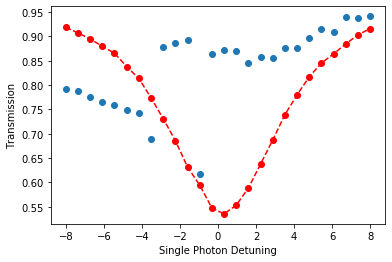

In [209]:
#var=[]


#f = open("var.txt", "r")

#for v in f:
    #try:
    ##print(float(v[9:19]))
     #   var.append(float(v[9:15]))
   # except:
   #     a=1


#print(var)
#print(valblue)

#popt1, pcov1 = opt.curve_fit(lorentz,variables,valsum, p0=(3,0.67,2,0.5))

#print(popt1)




plt.plot(variables,valsum,marker='o',linestyle='')
plt.plot(variables,valred,marker='o',linestyle='--',color="red")
#plt.plot(variables,lorentz(np.array(variables), *popt1))
plt.xlabel("Single Photon Detuning")
plt.ylabel("Transmission")
plt.savefig("eit.svg")
plt.show()

#n = np.argmax(-np.array(valdiv))